In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
supertails_dir = '/content/drive/MyDrive/supertails'

files_in_dir = os.listdir(supertails_dir)
csv_files = []

for file_name in files_in_dir:
    if file_name.endswith('.csv'):
        full_path = os.path.join(supertails_dir, file_name)
        csv_files.append(full_path)

In [4]:
dataframes = {}

for file_path in csv_files:
    file_key = os.path.splitext(os.path.basename(file_path))[0]
    df = pd.read_csv(file_path)
    dataframes[file_key] = df
    print(f"Loaded '{file_key}' into a DataFrame.")

Loaded 'vet_calls' into a DataFrame.
Loaded 'support_tickets' into a DataFrame.
Loaded 'supply_chain' into a DataFrame.
Loaded 'orders' into a DataFrame.
Loaded 'communication_logs' into a DataFrame.


In [17]:
orders = dataframes['orders']
support_tickets = dataframes['support_tickets']
supply_chain = dataframes['supply_chain']
vet_calls = dataframes['vet_calls']
communication_logs = dataframes['communication_logs']

print(orders.head(5))
print(support_tickets.head(5))
print(supply_chain.head(5))
print(vet_calls.head(5))
print(communication_logs.head(5))

       order_id  customer_id          order_date order_status payment_mode  \
0  ST2025000000         8270 2024-02-10 02:13:00    Delivered          UPI   
1  ST2025000001         1860 2024-09-09 22:45:00      Shipped          COD   
2  ST2025000002         6390 2024-02-06 19:52:00    Delivered          COD   
3  ST2025000003         6191 2024-10-15 18:26:00      Shipped       Wallet   
4  ST2025000004         6734 2024-05-14 23:22:00    Delivered         Card   

  product_id product_category  order_value  discount_value  \
0   SKU03899      Accessories      2384.14          298.90   
1   SKU03852             Food      2449.95          462.15   
2   SKU02734      Accessories      3183.37          255.23   
3   SKU03811      Accessories      3814.24          139.82   
4   SKU02654         Grooming      1519.94          192.42   

  promised_delivery_date actual_delivery_date     city        state  \
0    2024-02-15 02:13:00  2024-02-14 02:13:00  Kolkata   Tamil Nadu   
1    2024-09-13 

# Data Cleaning

## Check for missing values

In [18]:
for df_name, df in dataframes.items():
    print(f"\nNull values in '{df_name}' DataFrame:")
    print(df.isnull().sum())


Null values in 'vet_calls' DataFrame:
call_id                 0
customer_id             0
order_id                0
call_type               0
call_start_time         0
call_duration_secs      0
vet_transfer_success    0
dtype: int64

Null values in 'support_tickets' DataFrame:
ticket_id            0
customer_id          0
order_id             0
issue_category       0
created_at           0
resolved_at          0
resolution_status    0
csat_score           0
dtype: int64

Null values in 'supply_chain' DataFrame:
order_id              0
warehouse             0
first_mile_scan       0
hub_in_scan           0
out_for_delivery      0
rto_flag              0
courier_delay_flag    0
weight                0
shipment_tat_hours    0
dtype: int64

Null values in 'orders' DataFrame:
order_id                  0
customer_id               0
order_date                0
order_status              0
payment_mode              0
product_id                0
product_category          0
order_value          

### There are no missing values in the loaded tables

In [19]:
## Convert date columns to datetime objects

orders['order_date'] = pd.to_datetime(orders['order_date'])
orders['promised_delivery_date'] = pd.to_datetime(orders['promised_delivery_date'])
orders['actual_delivery_date'] = pd.to_datetime(orders['actual_delivery_date'])

support_tickets['created_at'] = pd.to_datetime(support_tickets['created_at'])
support_tickets['resolved_at'] = pd.to_datetime(support_tickets['resolved_at'])

vet_calls['call_start_time'] = pd.to_datetime(vet_calls['call_start_time'])

supply_chain['first_mile_scan'] = pd.to_datetime(supply_chain['first_mile_scan'])
supply_chain['hub_in_scan'] = pd.to_datetime(supply_chain['hub_in_scan'])
supply_chain['out_for_delivery'] = pd.to_datetime(supply_chain['out_for_delivery'])


communication_logs['sent_time'] = pd.to_datetime(communication_logs['sent_time'])

In [20]:
# Check for duplicate order_id
duplicate_order_ids = orders[orders['order_id'].duplicated(keep=False)]
if not duplicate_order_ids.empty:
    print("Invalid records: Duplicate 'order_id' found.")
    print(duplicate_order_ids)
else:
    print("No duplicate 'order_id' found.")

No duplicate 'order_id' found.


In [21]:
orders.describe()

,customer_id,order_date,order_value,discount_value,promised_delivery_date,actual_delivery_date
count,10000.000000,10000,10000.000000,10000.000000,10000,10000
mean,5462.898000,2024-07-01 21:22:31.656000,2069.241024,250.678895,2024-07-04 21:35:20.616000,2024-07-05 21:11:00.455999744
min,1001.000000,2024-01-01 00:29:00,150.060000,0.000000,2024-01-02 03:18:00,2024-01-02 12:00:00
25%,3217.000000,2024-04-01 12:21:15,1110.437500,126.377500,2024-04-04 14:52:45,2024-04-05 10:30:15
50%,5477.000000,2024-07-03 15:48:00,2058.745000,251.890000,2024-07-06 15:58:00,2024-07-07 03:05:30
75%,7698.000000,2024-09-29 21:49:00,3047.722500,375.622500,2024-10-02 23:15:00,2024-10-03 22:49:00
max,9998.000000,2024-12-30 22:30:00,3999.890000,499.920000,2025-01-04 20:25:00,2025-01-06 20:25:00
std,2589.212679,NaN,1113.651032,144.323034,NaN,NaN


In [22]:
# Check for negative order_value
invalid_order_value = orders[orders['order_value'] < 0]
if not invalid_order_value.empty:
    print("Invalid records: 'order_value' is negative.")
    display(invalid_order_value)
else:
    print("No negative 'order_value' found.")

# Check for negative discount_value
invalid_discount_value = orders[orders['discount_value'] < 0]
if not invalid_discount_value.empty:
    print("Invalid records: 'discount_value' is negative.")
    display(invalid_discount_value)
else:
    print("No negative 'discount_value' found.")

# Check for actual_delivery_date before order_date
invalid_actual_delivery = orders[orders['actual_delivery_date'] < orders['order_date']]
if not invalid_actual_delivery.empty:
    print("\nInvalid records: 'actual_delivery_date' is before 'order_date'.")
    display(invalid_actual_delivery)
else:
    print("No 'actual_delivery_date' before 'order_date' found.")

# Check for promised_delivery_date before order_date
invalid_promised_delivery = orders[orders['promised_delivery_date'] < orders['order_date']]
if not invalid_promised_delivery.empty:
    print("\nInvalid records: 'promised_delivery_date' is before 'order_date'.")
    display(invalid_promised_delivery)
else:
    print("No 'promised_delivery_date' before 'order_date' found.")

No negative 'order_value' found.
No negative 'discount_value' found.
No 'actual_delivery_date' before 'order_date' found.
No 'promised_delivery_date' before 'order_date' found.


## Exploratory Data Analysis

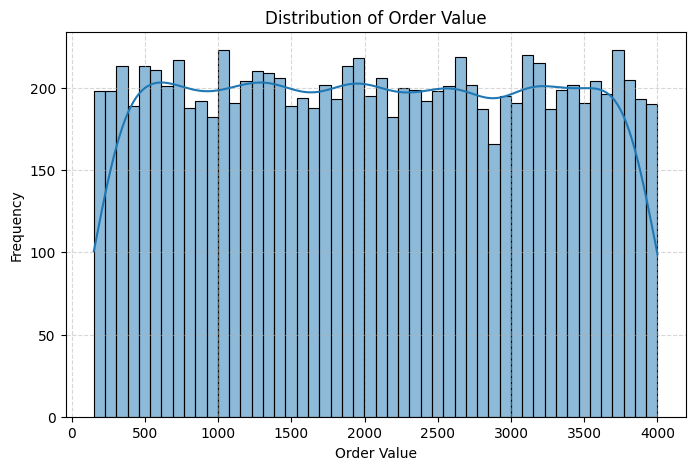

In [23]:
## Order value distribution

plt.figure(figsize=(8, 5))
sns.histplot(orders['order_value'], kde=True, bins=50)
plt.title('Distribution of Order Value')
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

/tmp/ipython-input-1030523312.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='order_value', y='product_category', data=category_revenue, palette='viridis')


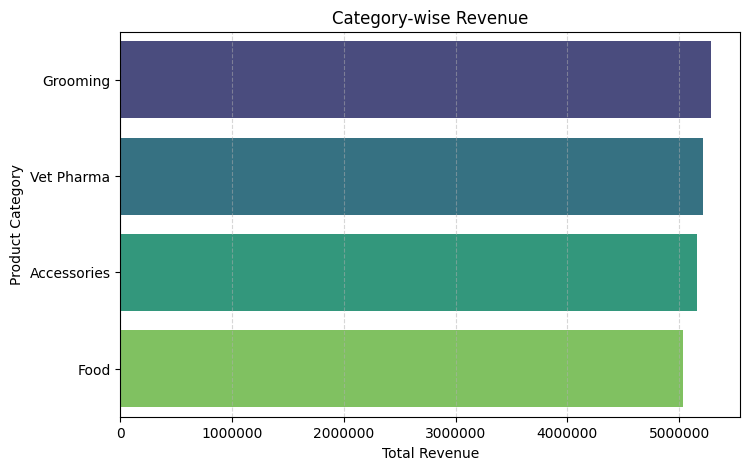

In [25]:
import matplotlib.ticker as ticker

## Category-wise revenue
category_revenue = orders.groupby('product_category')['order_value'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='order_value', y='product_category', data=category_revenue, palette='viridis')
plt.title('Category-wise Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Category')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

/tmp/ipython-input-1247014225.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='order_value', y='city', data=city_performance.head(10), palette='plasma')


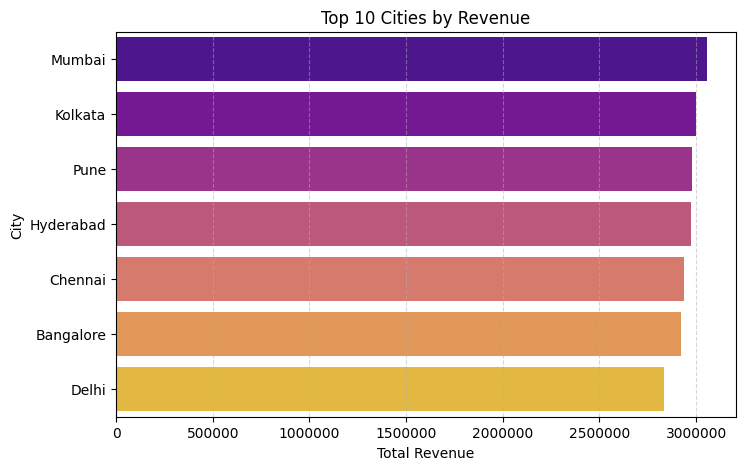

In [26]:
## City-level performance
city_performance = orders.groupby('city')['order_value'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='order_value', y='city', data=city_performance.head(10), palette='plasma')
plt.title('Top 10 Cities by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('City')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

/tmp/ipython-input-359241215.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='payment_mode', y='count', data=payment_mode_counts, palette='viridis')


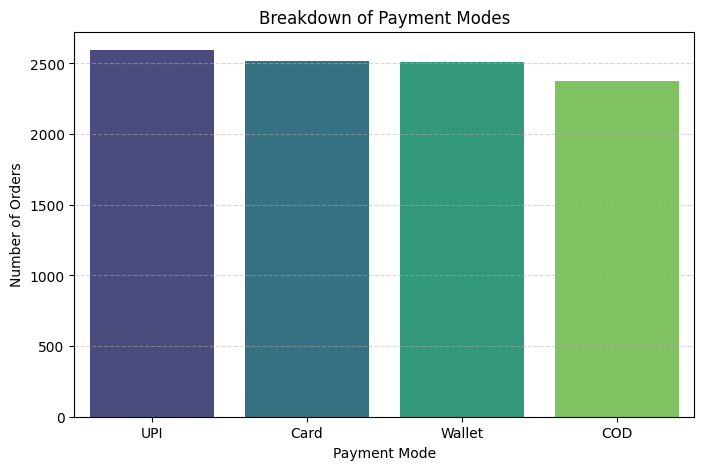

In [27]:
## Payment mode breakdown
payment_mode_counts = orders['payment_mode'].value_counts().reset_index()
payment_mode_counts.columns = ['payment_mode', 'count']

plt.figure(figsize=(8, 5))
sns.barplot(x='payment_mode', y='count', data=payment_mode_counts, palette='viridis')
plt.title('Breakdown of Payment Modes')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Orders')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

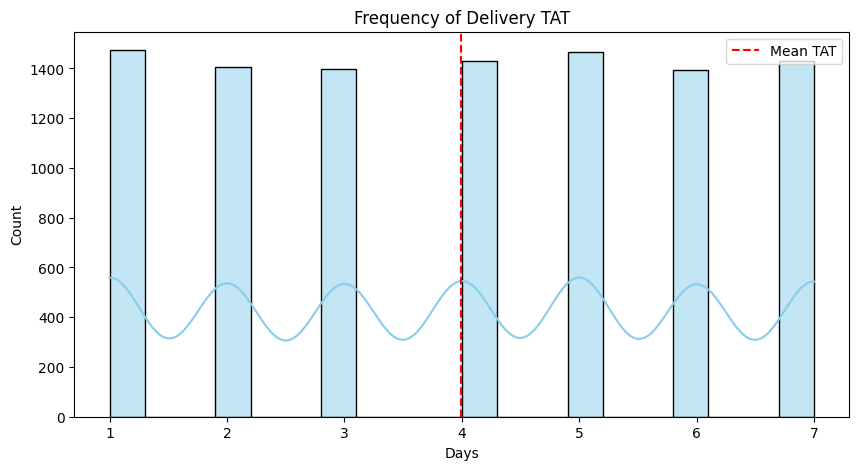

In [28]:
## Delivery TAT distribution
orders['delivery_tat'] = (orders['actual_delivery_date'] - orders['order_date']).dt.days

plt.figure(figsize=(10, 5))
sns.histplot(orders['delivery_tat'], kde=True, color='skyblue', bins=20)
plt.axvline(orders['delivery_tat'].mean(), color='red', linestyle='--', label='Mean TAT')
plt.title('Frequency of Delivery TAT')
plt.xlabel('Days')
plt.legend()
plt.show()

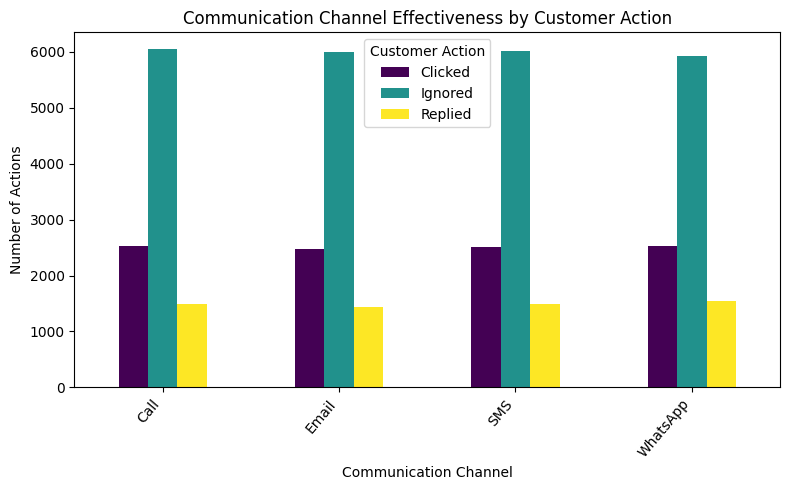

In [30]:
communication_effectiveness = communication_logs.groupby('channel')['customer_action'].value_counts().unstack(fill_value=0)

## Communication channel read/click effectiveness
communication_effectiveness.plot(kind='bar', figsize=(8, 5), colormap='viridis')
plt.title('Communication Channel Effectiveness by Customer Action')
plt.xlabel('Communication Channel')
plt.ylabel('Number of Actions')
plt.xticks(rotation=50, ha='right')
plt.legend(title='Customer Action')
plt.tight_layout()
plt.show()

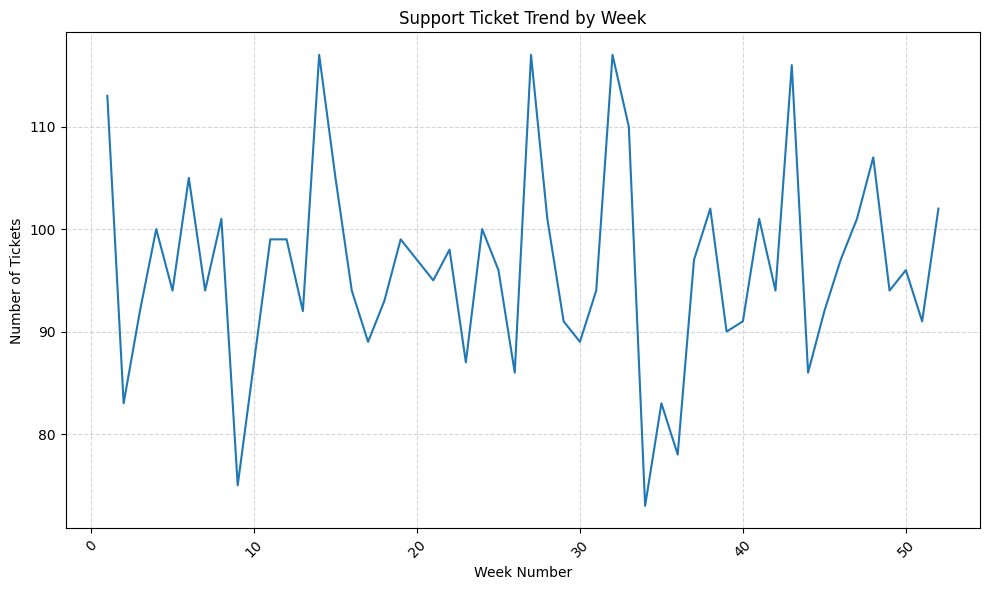

In [32]:
# Sort by week for proper trend visualization
support_tickets['week'] = support_tickets['created_at'].dt.isocalendar().week.astype(int)
weekly_tickets = support_tickets.groupby('week').size().reset_index(name='ticket_count')
weekly_tickets = weekly_tickets.sort_values('week')

plt.figure(figsize=(10, 6))
sns.lineplot(x='week', y='ticket_count', data=weekly_tickets)
plt.title('Support Ticket Trend by Week')
plt.xlabel('Week Number')
plt.ylabel('Number of Tickets')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# RFM & Customer Segmentation

## Build Recency, Frequency, Monetary scores

In [35]:
reference_date = orders['order_date'].max()

last_purchase_date = orders.groupby('customer_id')['order_date'].max()

# Recency
recency = (reference_date - last_purchase_date).dt.days

print("Reference Date:", reference_date)
print("\nRecency scores:\n", recency.head(5))

Reference Date: 2024-12-30 22:30:00

Recency scores:
 customer_id
1001     21
1002     66
1004    177
1005    317
1006    160
Name: order_date, dtype: int64


In [38]:
# Frequency
frequency = orders.groupby('customer_id')['order_id'].nunique()

print("Frequency scores:\n", frequency.head(5))

Frequency scores:
 customer_id
1001    3
1002    2
1004    2
1005    1
1006    1
Name: order_id, dtype: int64


In [39]:
# Monetary
monetary = orders.groupby('customer_id')['order_value'].sum()

print("Monetary scores:\n", monetary.head(5))

Monetary scores:
 customer_id
1001    9499.65
1002    5728.43
1004    3338.67
1005    2274.95
1006    1623.44
Name: order_value, dtype: float64


In [40]:
# Now create RMF Dataframe
rfm_df = pd.DataFrame({
    'Recency (In days)': recency,
    'Frequency': frequency,
    'Monetary': monetary
})

print("RFM scores:\n", rfm_df.head(5))

RFM scores:
              Recency (In days)  Frequency  Monetary
customer_id                                        
1001                        21          3   9499.65
1002                        66          2   5728.43
1004                       177          2   3338.67
1005                       317          1   2274.95
1006                       160          1   1623.44


In [42]:
# Setting criteria for classifying customers into Gold, Silver, Bronze, At-Risk and New based on their Recency, Frequency, and Monetary scores.
r_quartiles = rfm_df['Recency (In days)'].quantile([0.25, 0.5, 0.75])
f_quartiles = rfm_df['Frequency'].quantile([0.25, 0.5, 0.75])
m_quartiles = rfm_df['Monetary'].quantile([0.25, 0.5, 0.75])

print("Recency Quartiles:\n", r_quartiles)
print("\nFrequency Quartiles:\n", f_quartiles)
print("\nMonetary Quartiles:\n", m_quartiles)

Recency Quartiles:
 0.25     59.0
0.50    135.0
0.75    229.0
Name: Recency (In days), dtype: float64

Frequency Quartiles:
 0.25    1.0
0.50    1.0
0.75    2.0
Name: Frequency, dtype: float64

Monetary Quartiles:
 0.25    1715.9975
0.50    3086.1250
0.75    4542.9750
Name: Monetary, dtype: float64


In [43]:
def assign_r_score(recency, r_quartiles):
    if recency <= r_quartiles[0.25]:
        return 4
    elif recency <= r_quartiles[0.50]:
        return 3
    elif recency <= r_quartiles[0.75]:
        return 2
    else:
        return 1

def assign_f_score(frequency, f_quartiles):
    if frequency <= f_quartiles[0.25]:
        return 1
    elif frequency <= f_quartiles[0.50]:
        return 2
    elif frequency <= f_quartiles[0.75]:
        return 3
    else:
        return 4

def assign_m_score(monetary, m_quartiles):
    if monetary <= m_quartiles[0.25]:
        return 1
    elif monetary <= m_quartiles[0.50]:
        return 2
    elif monetary <= m_quartiles[0.75]:
        return 3
    else:
        return 4

# Apply the scoring functions to the rfm_df
rfm_df['R_Score'] = rfm_df['Recency (In days)'].apply(lambda x: assign_r_score(x, r_quartiles))
rfm_df['F_Score'] = rfm_df['Frequency'].apply(lambda x: assign_f_score(x, f_quartiles))
rfm_df['M_Score'] = rfm_df['Monetary'].apply(lambda x: assign_m_score(x, m_quartiles))

print("RFM DataFrame with individual scores (first 5 customers):")
print(rfm_df.head())

RFM DataFrame with individual scores (first 5 customers):
             Recency (In days)  Frequency  Monetary  R_Score  F_Score  M_Score
customer_id                                                                   
1001                        21          3   9499.65        4        4        4
1002                        66          2   5728.43        3        3        4
1004                       177          2   3338.67        2        3        3
1005                       317          1   2274.95        1        1        2
1006                       160          1   1623.44        2        1        1


In [44]:
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

print("RFM DataFrame with combined RFM_Score (first 5 customers):")
print(rfm_df.head())

RFM DataFrame with combined RFM_Score (first 5 customers):
             Recency (In days)  Frequency  Monetary  R_Score  F_Score  \
customer_id                                                             
1001                        21          3   9499.65        4        4   
1002                        66          2   5728.43        3        3   
1004                       177          2   3338.67        2        3   
1005                       317          1   2274.95        1        1   
1006                       160          1   1623.44        2        1   

             M_Score RFM_Score  
customer_id                     
1001               4       444  
1002               4       334  
1004               3       233  
1005               2       112  
1006               1       211  


In [45]:
def assign_segment(row):
    r_score = row['R_Score']
    f_score = row['F_Score']
    m_score = row['M_Score']

    if r_score == 4 and f_score == 4 and m_score == 4:
        return 'Gold Customer'
    elif (r_score == 4 and f_score >= 3) or (f_score == 4 and m_score >= 3):
        return 'Silver Customer'
    elif (r_score >= 3 and f_score >= 2) or (f_score >= 3 and m_score >= 2):
        return 'Bronze Customer'
    elif r_score <= 2 and f_score <= 2 and m_score <= 2:
        return 'At-Risk Customer'
    elif r_score >= 3 and f_score == 1 and m_score == 1:
        return 'New Customer'
    else:
        return 'Regular Customer'

rfm_df['Customer_Segment'] = rfm_df.apply(assign_segment, axis=1)

print("RFM DataFrame with Customer Segments (first 5 customers):")
print(rfm_df.head())

RFM DataFrame with Customer Segments (first 5 customers):
             Recency (In days)  Frequency  Monetary  R_Score  F_Score  \
customer_id                                                             
1001                        21          3   9499.65        4        4   
1002                        66          2   5728.43        3        3   
1004                       177          2   3338.67        2        3   
1005                       317          1   2274.95        1        1   
1006                       160          1   1623.44        2        1   

             M_Score RFM_Score  Customer_Segment  
customer_id                                       
1001               4       444     Gold Customer  
1002               4       334   Bronze Customer  
1004               3       233   Bronze Customer  
1005               2       112  At-Risk Customer  
1006               1       211  At-Risk Customer  


/tmp/ipython-input-302407324.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer_Segment', y='Count', data=segment_distribution, palette='viridis')


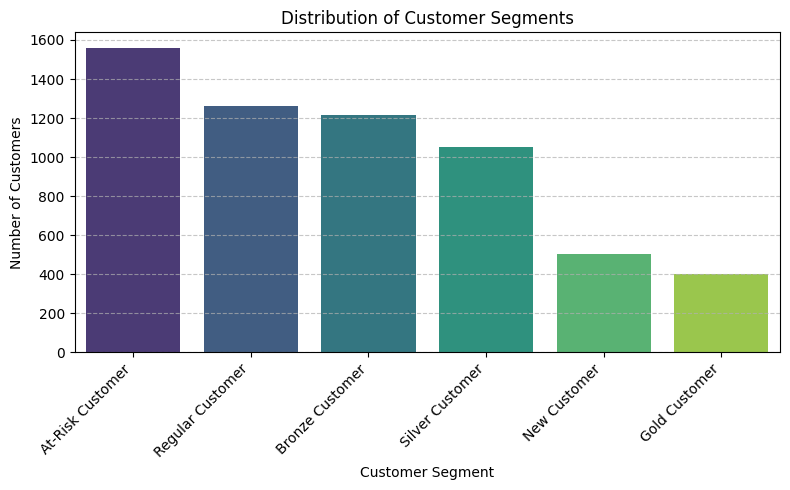

In [47]:
segment_distribution = rfm_df['Customer_Segment'].value_counts().reset_index()
segment_distribution.columns = ['Customer_Segment', 'Count']

plt.figure(figsize=(8, 5))
sns.barplot(x='Customer_Segment', y='Count', data=segment_distribution, palette='viridis')
plt.title('Distribution of Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [57]:
# Sengment summary
segment_summary = rfm_df.groupby('Customer_Segment')[['Recency (In days)', 'Frequency', 'Monetary']].mean()

print("Average RFM scores by Customer Segment:")
print(segment_summary)

Average RFM scores by Customer Segment:
                  Recency (In days)  Frequency     Monetary
Customer_Segment                                           
At-Risk Customer         249.825753   1.000000  1585.005714
Bronze Customer          159.426929   2.018062  4164.937258
Gold Customer             25.032419   3.463840  7780.340574
New Customer              69.205941   1.000000   918.769881
Regular Customer         148.831487   1.040348  3062.842263
Silver Customer           74.017094   2.632479  5403.603761


# Predictive Analytics

In [58]:
total_orders = orders['order_id'].nunique()
total_revenue = orders['order_value'].sum()
average_order_value = orders['order_value'].mean()

print(f"Total Orders: {total_orders}")
print(f"Total Revenue: {total_revenue:,.2f}")
print(f"Average Order Value: {average_order_value:,.2f}")

Total Orders: 10000
Total Revenue: 20,692,410.24
Average Order Value: 2,069.24


In [62]:
support_ticket_customers = support_tickets[['customer_id']].drop_duplicates()
support_ticket_customers['has_support_ticket'] = 1

merged_df = orders.merge(support_ticket_customers, on='customer_id', how='left')

merged_df['has_support_ticket'] = merged_df['has_support_ticket'].fillna(0)
merged_df['has_support_ticket'] = merged_df['has_support_ticket'].astype(int)

print(merged_df.head())

       order_id  customer_id          order_date order_status payment_mode  \
0  ST2025000000         8270 2024-02-10 02:13:00    Delivered          UPI   
1  ST2025000001         1860 2024-09-09 22:45:00      Shipped          COD   
2  ST2025000002         6390 2024-02-06 19:52:00    Delivered          COD   
3  ST2025000003         6191 2024-10-15 18:26:00      Shipped       Wallet   
4  ST2025000004         6734 2024-05-14 23:22:00    Delivered         Card   

  product_id product_category  order_value  discount_value  \
0   SKU03899      Accessories      2384.14          298.90   
1   SKU03852             Food      2449.95          462.15   
2   SKU02734      Accessories      3183.37          255.23   
3   SKU03811      Accessories      3814.24          139.82   
4   SKU02654         Grooming      1519.94          192.42   

  promised_delivery_date actual_delivery_date     city        state  \
0    2024-02-15 02:13:00  2024-02-14 02:13:00  Kolkata   Tamil Nadu   
1    2024-09-13 

In [63]:
comm_logs_with_cust_id = dataframes['communication_logs'].merge(orders[['order_id', 'customer_id']], on='order_id', how='left')

# 1. Aggregate total communications per customer
total_communications = comm_logs_with_cust_id.groupby('customer_id').size().reset_index(name='total_communications')

# 2. Aggregate and pivot customer actions
communication_summary = comm_logs_with_cust_id.groupby(['customer_id', 'customer_action']).size().unstack(fill_value=0).reset_index()
communication_summary.rename(columns={'Clicked': 'comm_clicked', 'Ignored': 'comm_ignored', 'Replied': 'comm_replied'}, inplace=True)

# Merge total_communications into merged_df
merged_df = merged_df.merge(total_communications, on='customer_id', how='left')

# Merge communication_summary into merged_df
merged_df = merged_df.merge(communication_summary, on='customer_id', how='left')

# Fill NaN values for new communication features with 0
merged_df['total_communications'] = merged_df['total_communications'].fillna(0).astype(int)
merged_df['comm_clicked'] = merged_df['comm_clicked'].fillna(0).astype(int)
merged_df['comm_ignored'] = merged_df['comm_ignored'].fillna(0).astype(int)
merged_df['comm_replied'] = merged_df['comm_replied'].fillna(0).astype(int)

print("First 5 rows of merged_df with communication features:")
print(merged_df.head())

print("\nData types of merged_df after adding communication features:")

First 5 rows of merged_df with communication features:
       order_id  customer_id          order_date order_status payment_mode  \
0  ST2025000000         8270 2024-02-10 02:13:00    Delivered          UPI   
1  ST2025000001         1860 2024-09-09 22:45:00      Shipped          COD   
2  ST2025000002         6390 2024-02-06 19:52:00    Delivered          COD   
3  ST2025000003         6191 2024-10-15 18:26:00      Shipped       Wallet   
4  ST2025000004         6734 2024-05-14 23:22:00    Delivered         Card   

  product_id product_category  order_value  discount_value  \
0   SKU03899      Accessories      2384.14          298.90   
1   SKU03852             Food      2449.95          462.15   
2   SKU02734      Accessories      3183.37          255.23   
3   SKU03811      Accessories      3814.24          139.82   
4   SKU02654         Grooming      1519.94          192.42   

  promised_delivery_date  ...        state is_repeat_customer  \
0    2024-02-15 02:13:00  ...   Tamil 

In [64]:
categorical_cols = ['order_status', 'payment_mode', 'product_category', 'city', 'state', 'shipment_partner', 'shipment_mode']

# Perform one-hot encoding
dummy_cols = pd.get_dummies(merged_df[categorical_cols], drop_first=True)

# Concatenate dummy columns with the original DataFrame
merged_df = pd.concat([merged_df, dummy_cols], axis=1)

# Drop the original categorical columns
merged_df.drop(columns=categorical_cols, inplace=True)

print(merged_df.head())

       order_id  customer_id          order_date product_id  order_value  \
0  ST2025000000         8270 2024-02-10 02:13:00   SKU03899      2384.14   
1  ST2025000001         1860 2024-09-09 22:45:00   SKU03852      2449.95   
2  ST2025000002         6390 2024-02-06 19:52:00   SKU02734      3183.37   
3  ST2025000003         6191 2024-10-15 18:26:00   SKU03811      3814.24   
4  ST2025000004         6734 2024-05-14 23:22:00   SKU02654      1519.94   

   discount_value promised_delivery_date actual_delivery_date  \
0          298.90    2024-02-15 02:13:00  2024-02-14 02:13:00   
1          462.15    2024-09-13 22:45:00  2024-09-14 22:45:00   
2          255.23    2024-02-09 19:52:00  2024-02-09 19:52:00   
3          139.82    2024-10-17 18:26:00  2024-10-19 18:26:00   
4          192.42    2024-05-16 23:22:00  2024-05-15 23:22:00   

   is_repeat_customer  delivery_tat  ...  city_Pune  state_Karnataka  \
0                True             4  ...      False            False   
1       

# Train Randon Forest model

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = merged_df.drop(columns=['order_id', 'customer_id', 'order_date', 'product_id', 'promised_delivery_date', 'actual_delivery_date', 'has_support_ticket'])
y = merged_df['has_support_ticket']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (8000, 33), (8000,)
Testing set shape: (2000, 33), (2000,)


In [70]:
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Evaluation on Test Set:\n")
print(f"AUC: {auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Model Evaluation on Test Set:

AUC: 0.6486
Accuracy: 0.6340
Recall: 0.6789
F1-Score: 0.6942


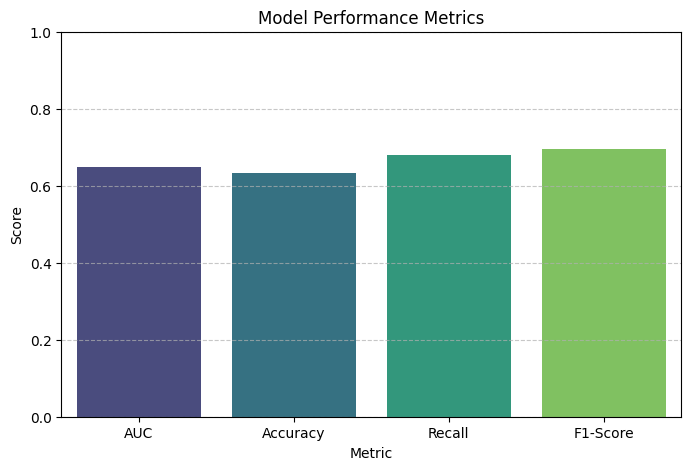

In [71]:
metrics_data = {
    'Metric': ['AUC', 'Accuracy', 'Recall', 'F1-Score'],
    'Value': [auc, accuracy, recall, f1]
}
metrics_df = pd.DataFrame(metrics_data)

plt.figure(figsize=(8, 5))
sns.barplot(x='Metric', y='Value', data=metrics_df, hue='Metric', palette='viridis', legend=False)
plt.title('Model Performance Metrics')
plt.ylim(0, 1) # Metrics are typically between 0 and 1
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Supply Chain Insights

In [72]:
# Correlation analysis: weight vs TAT vs shipment_mode

correlation = supply_chain['weight'].corr(supply_chain['shipment_tat_hours'])
print(f"Pearson correlation between 'weight' and 'shipment_tat_hours': {correlation:.4f}")

Pearson correlation between 'weight' and 'shipment_tat_hours': 0.0027


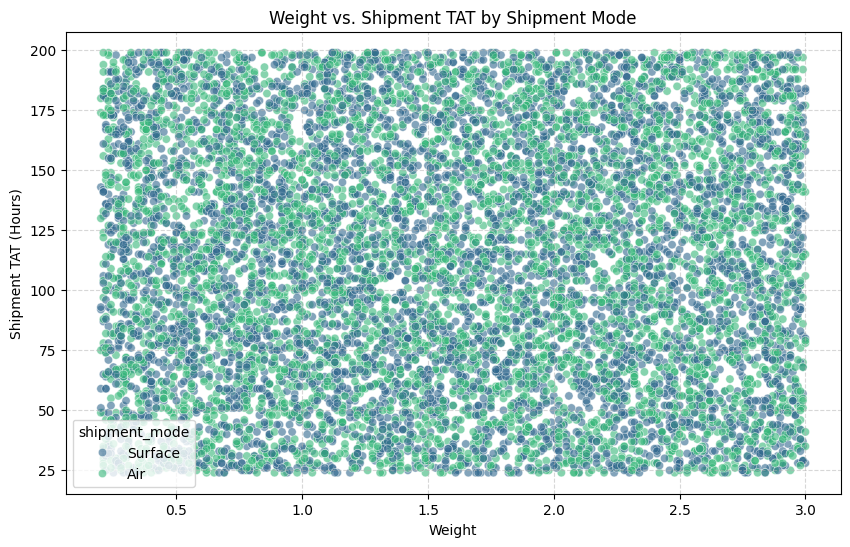

In [78]:
supply_chain_merged = supply_chain.merge(orders[['order_id', 'shipment_mode']], on='order_id', how='left')

# Scatter plot of weight vs. shipment_tat_hours colored by shipment_mode
plt.figure(figsize=(10, 6))
sns.scatterplot(x='weight', y='shipment_tat_hours', hue='shipment_mode', data=supply_chain_merged, palette='viridis', alpha=0.6)
plt.title('Weight vs. Shipment TAT by Shipment Mode')
plt.xlabel('Weight')
plt.ylabel('Shipment TAT (Hours)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

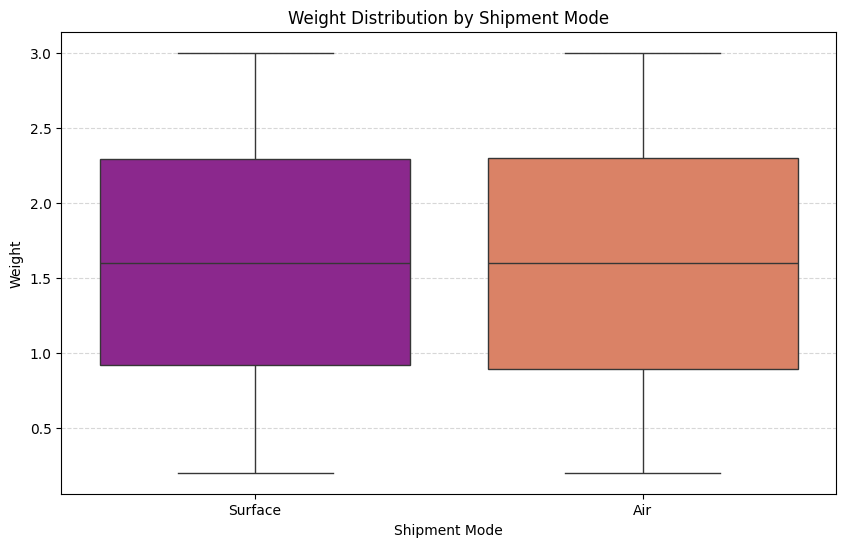

In [79]:
# Box plot of weight for each shipment_mode
plt.figure(figsize=(10, 6))
sns.boxplot(x='shipment_mode', y='weight', data=supply_chain_merged, hue='shipment_mode', palette='plasma', legend=False)
plt.title('Weight Distribution by Shipment Mode')
plt.xlabel('Shipment Mode')
plt.ylabel('Weight')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

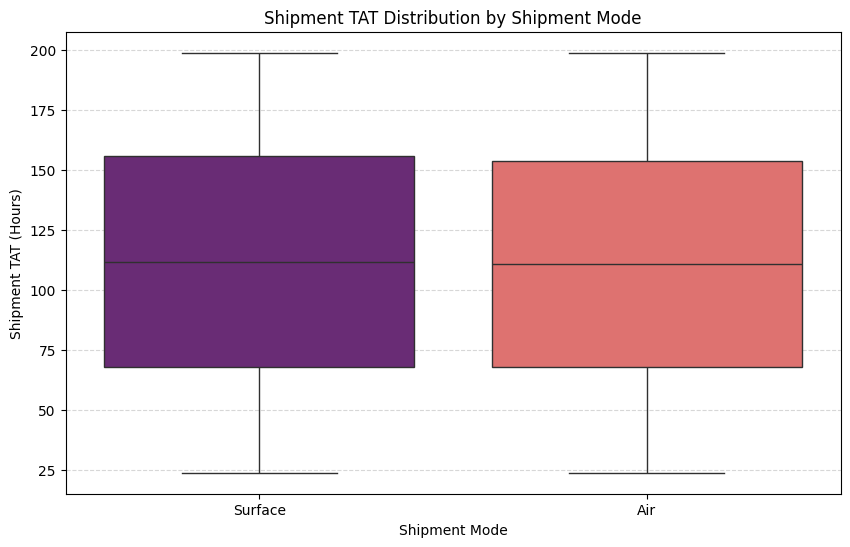

In [80]:
# Box plot of shipment_tat_hours for each shipment_mode
plt.figure(figsize=(10, 6))
sns.boxplot(x='shipment_mode', y='shipment_tat_hours', data=supply_chain_merged, hue='shipment_mode', palette='magma', legend=False)
plt.title('Shipment TAT Distribution by Shipment Mode')
plt.xlabel('Shipment Mode')
plt.ylabel('Shipment TAT (Hours)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [81]:
# Identify top 10 SKUs with highest RTO probability

orders_supply_chain = orders.merge(supply_chain, on='order_id', how='left')

rto_probability_per_sku = orders_supply_chain.groupby('product_id')['rto_flag'].mean().reset_index()
rto_probability_per_sku.rename(columns={'rto_flag': 'rto_probability'}, inplace=True)

rto_probability_per_sku.head(5)

,product_id,rto_probability
0,SKU00001,0.0
1,SKU00002,0.0
2,SKU00003,0.0
3,SKU00004,0.0
4,SKU00006,0.5


In [84]:
top_10_rto_skus = rto_probability_per_sku.sort_values(by='rto_probability', ascending=False).head(10)

print("Top 10 SKUs with highest RTO probability:")
print(top_10_rto_skus)

Top 10 SKUs with highest RTO probability:
     product_id  rto_probability
648    SKU00763              1.0
4280   SKU04970              1.0
724    SKU00857              1.0
660    SKU00780              1.0
700    SKU00826              1.0
4218   SKU04902              1.0
4227   SKU04911              1.0
4254   SKU04941              1.0
654    SKU00773              1.0
926    SKU01093              1.0


In [85]:
# Detect warehouse-level bottlenecks using hub_in_scan delays

supply_chain['first_mile_scan'] = pd.to_datetime(supply_chain['first_mile_scan'])
supply_chain['hub_in_scan'] = pd.to_datetime(supply_chain['hub_in_scan'])

supply_chain['hub_in_scan_delay_hours'] = (supply_chain['hub_in_scan'] - supply_chain['first_mile_scan']).dt.total_seconds() / 3600

print("First 5 rows of 'supply_chain' with 'hub_in_scan_delay_hours':")
print(supply_chain.head())

First 5 rows of 'supply_chain' with 'hub_in_scan_delay_hours':
       order_id warehouse     first_mile_scan         hub_in_scan  \
0  ST2025000000       HYD 2024-02-10 05:13:00 2024-02-10 23:13:00   
1  ST2025000001       GGN 2024-09-10 07:45:00 2024-09-10 17:45:00   
2  ST2025000002       BOM 2024-02-07 03:52:00 2024-02-07 14:52:00   
3  ST2025000003       BOM 2024-10-15 20:26:00 2024-10-17 00:26:00   
4  ST2025000004       BOM 2024-05-15 07:22:00 2024-05-16 07:22:00   

     out_for_delivery  rto_flag  courier_delay_flag  weight  \
0 2024-02-11 02:13:00     False               False    2.99   
1 2024-09-12 20:45:00     False               False    2.58   
2 2024-02-09 11:52:00     False               False    1.07   
3 2024-10-17 04:26:00     False               False    2.64   
4 2024-05-17 22:22:00     False               False    2.16   

   shipment_tat_hours  hub_in_scan_delay_hours  
0                  57                     18.0  
1                  63                     10.

In [86]:
# Aggregate delays by Warehouse

warehouse_delays = supply_chain.groupby('warehouse')['hub_in_scan_delay_hours'].mean().reset_index()

print("Average 'hub_in_scan' delay per warehouse (first 5 warehouses):")
print(warehouse_delays.head())

Average 'hub_in_scan' delay per warehouse (first 5 warehouses):
  warehouse  hub_in_scan_delay_hours
0       BLR                17.943792
1       BOM                17.922999
2       DEL                18.293713
3       GGN                18.020183
4       HYD                17.794740
